<a href="https://colab.research.google.com/github/pav16an/Feynn-Labs/blob/main/Project_3_Crop_Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
file_path = '/content/crop_yield.csv'
df = pd.read_csv(file_path)
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


# Exploratory Data Analysis

In [8]:
df.shape

(19689, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [10]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [11]:
df['Crop'].value_counts()

,count
Crop,
Rice,1197
Maize,975
Moong(Green Gram),740
Urad,733
Groundnut,725
Sesamum,685
Potato,628
Sugarcane,605
Wheat,545


# Data Preprocessing

In [12]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


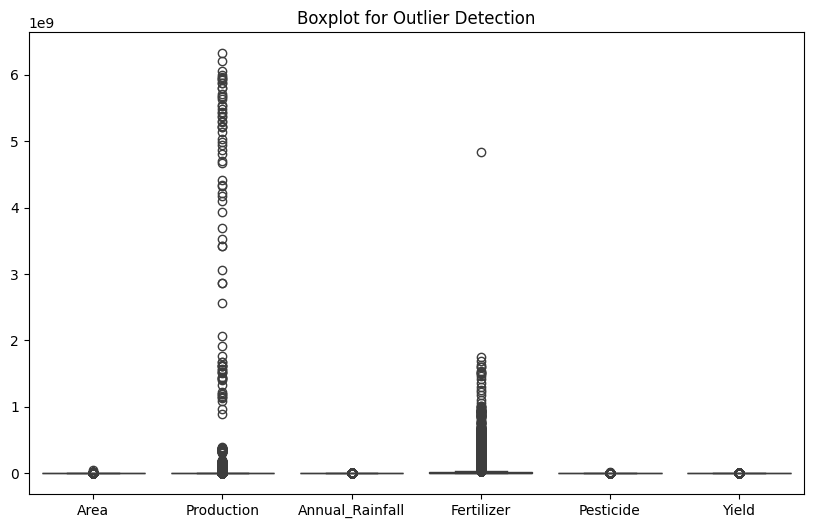

In [13]:
# Using boxplot for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [14]:
# Outlier removal using IQR
Q1 = df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].quantile(0.25)
Q3 = df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']] < (Q1 - 1.5 * IQR)) |(df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']] > (Q3 + 1.5 * IQR))).any(axis=1)]

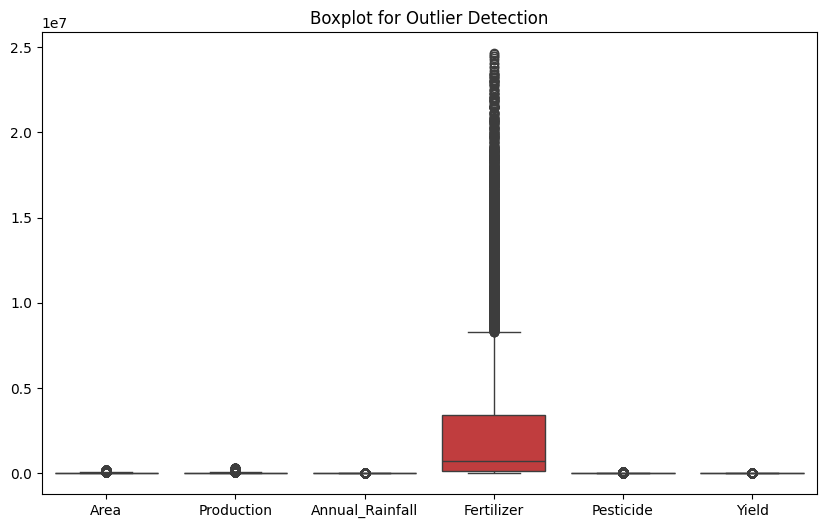

In [15]:
# Box plot after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']])
plt.title('Boxplot for Outlier Detection')
plt.show()

# Data Visualization

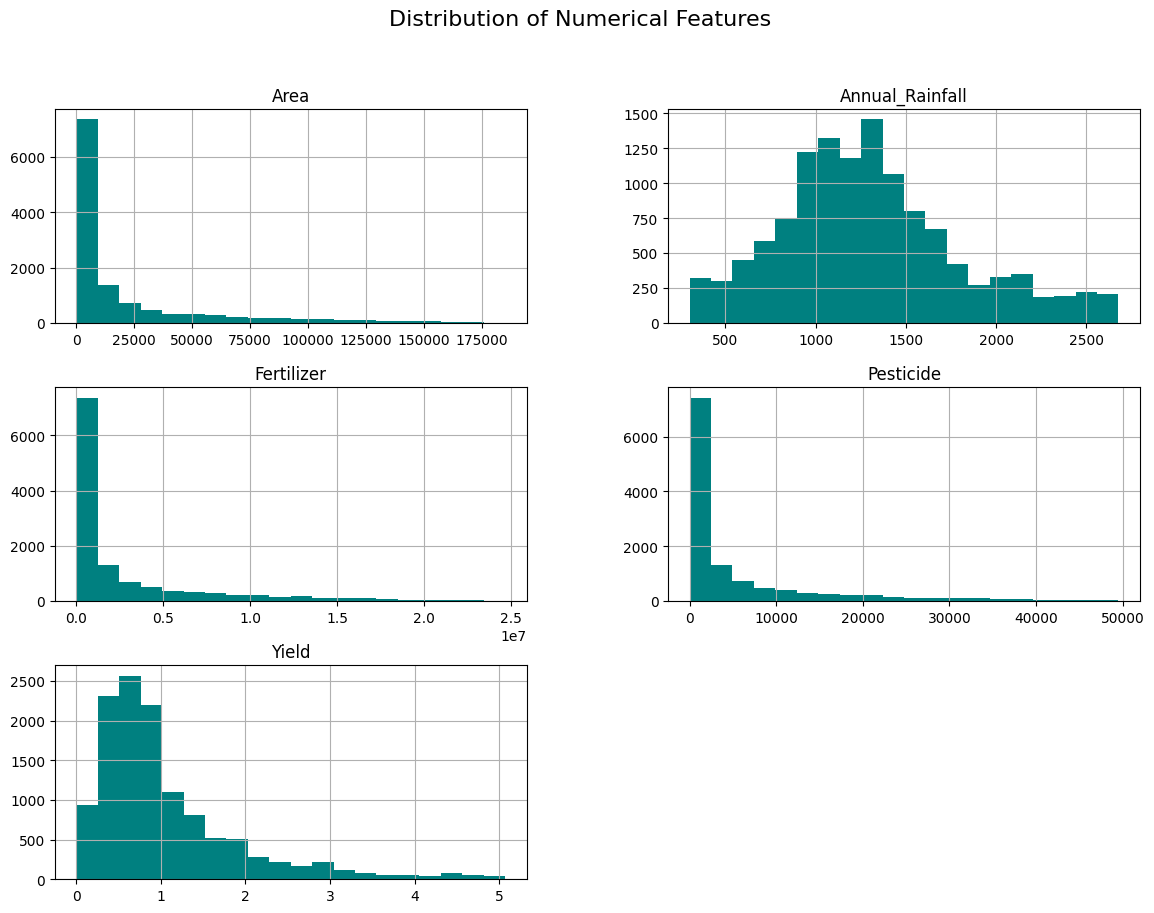

In [16]:
# Plot distribution of numerical features
df[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].hist(bins=20, figsize=(14, 10), color='teal')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

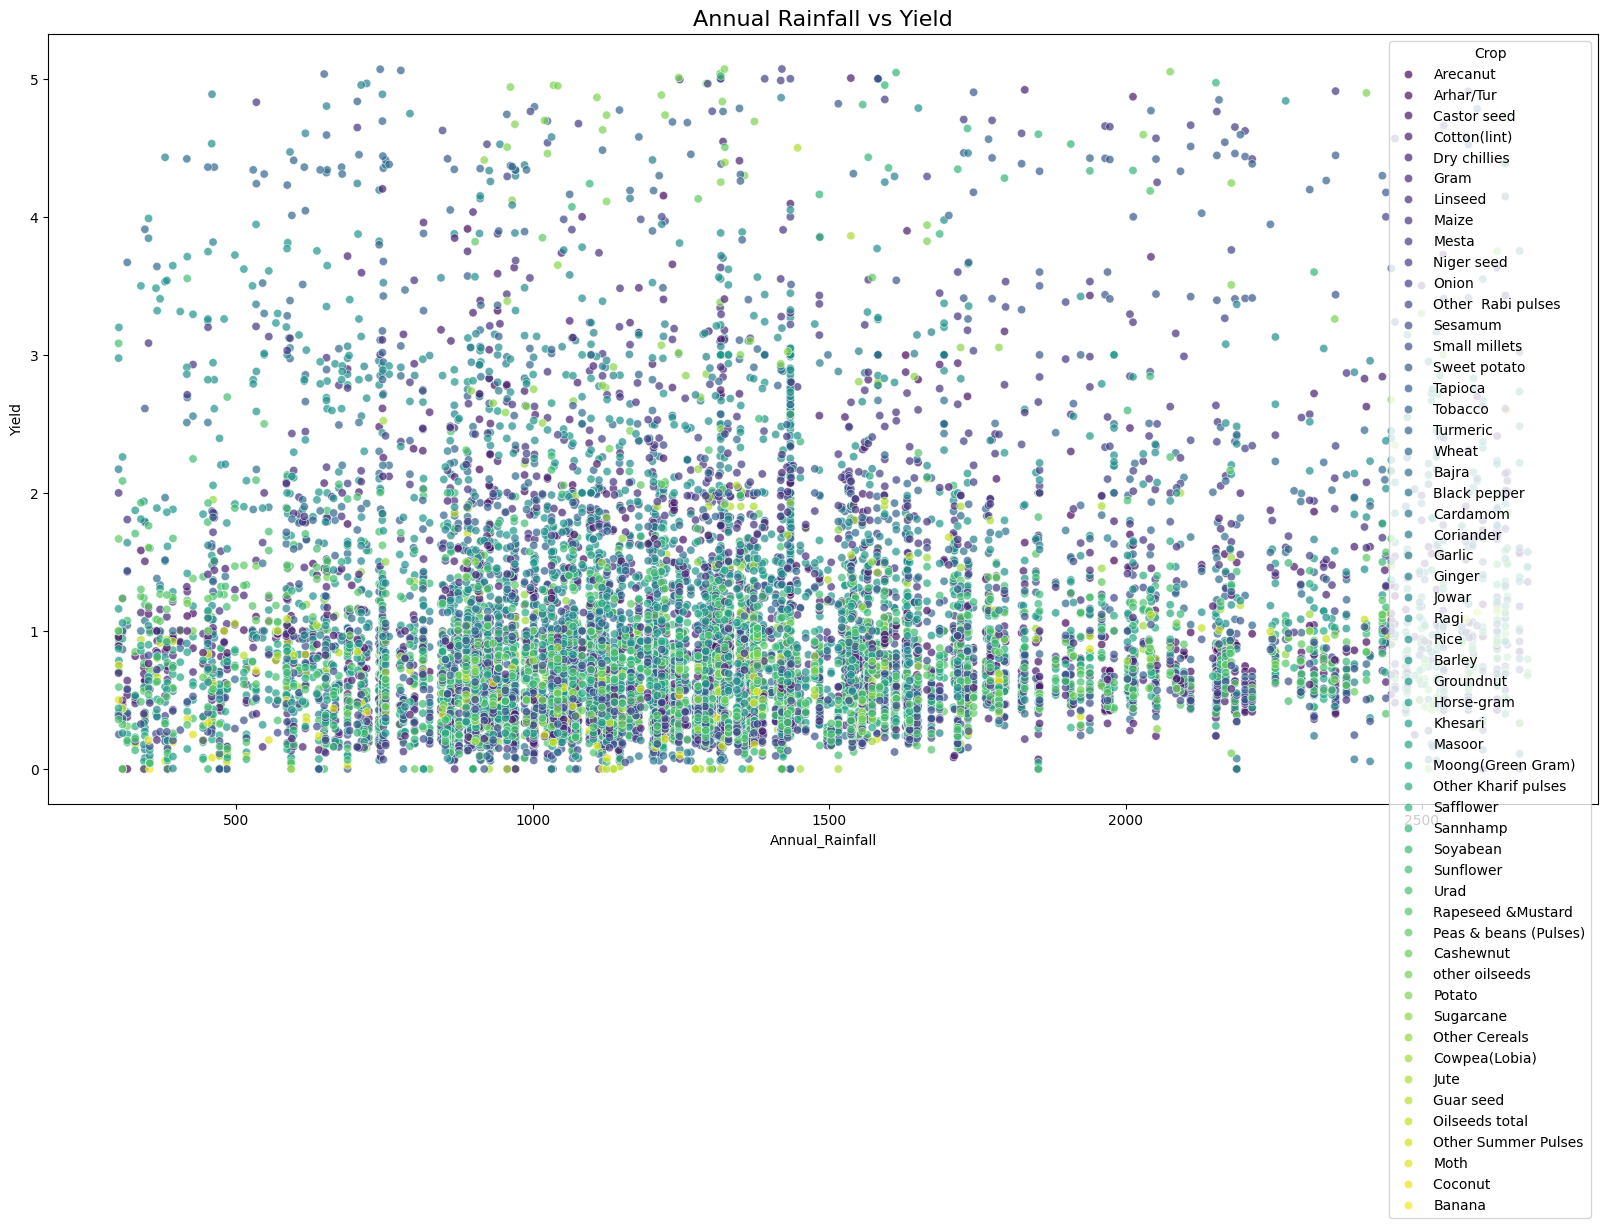

In [17]:
#scatter plot
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Annual_Rainfall', y='Yield', data=df, hue='Crop', palette='viridis', alpha=0.7)
plt.title('Annual Rainfall vs Yield', fontsize=16)
plt.show()

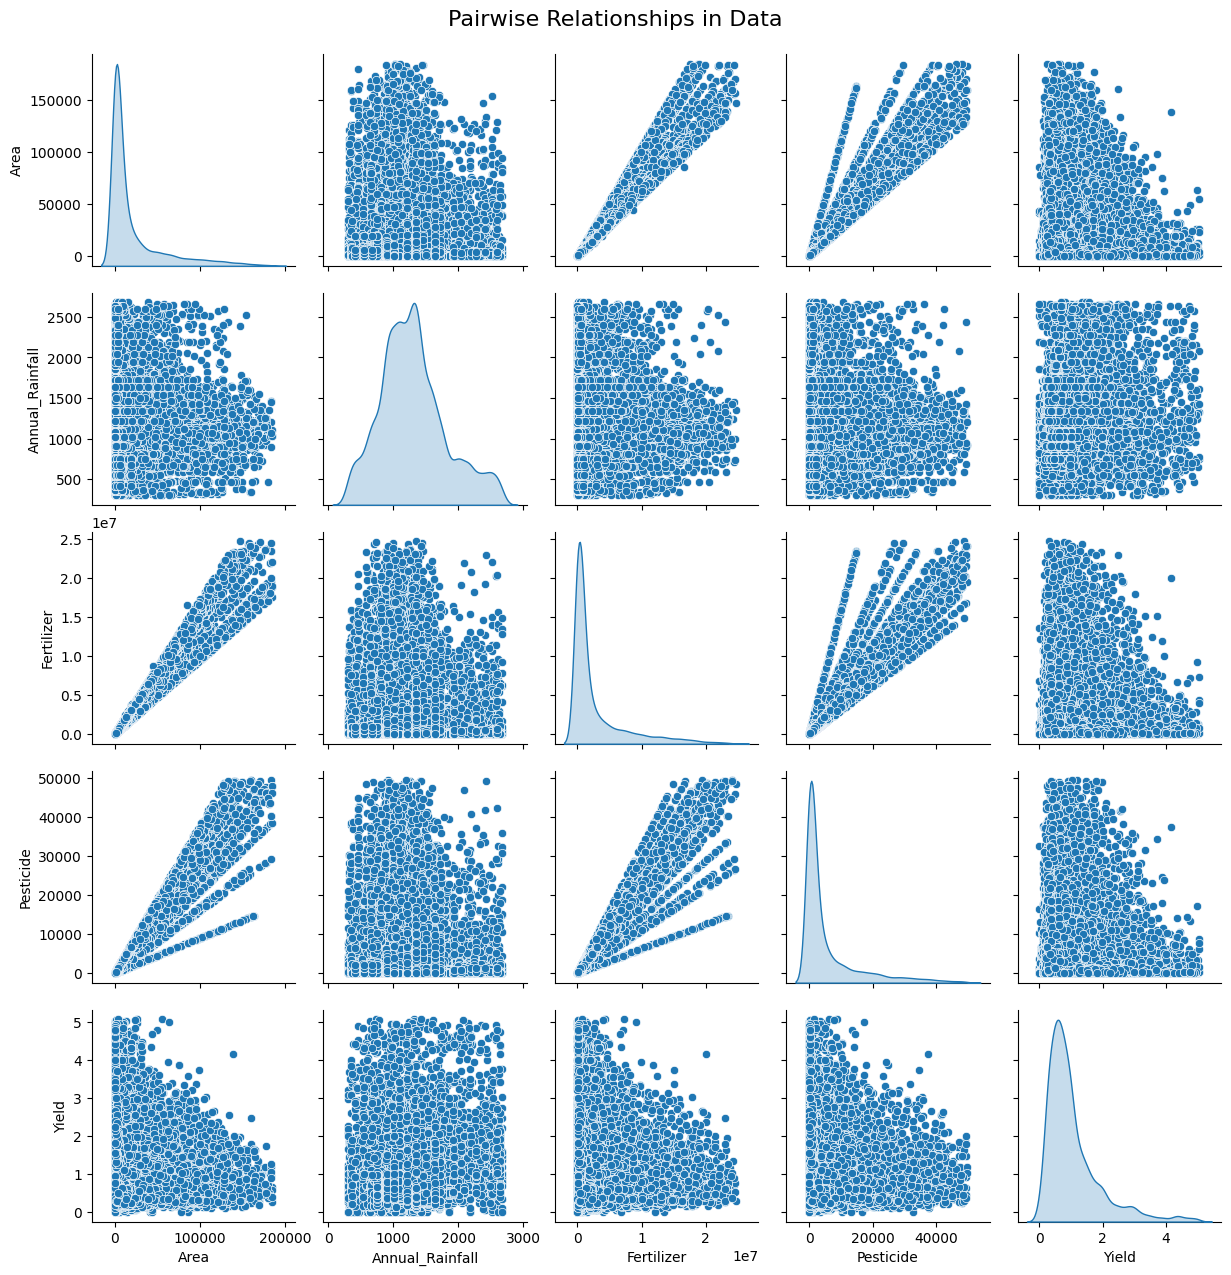

In [18]:
# Pairplot
sns.pairplot(df[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']], diag_kind='kde')
plt.suptitle('Pairwise Relationships in Data', y=1.02, fontsize=16)
plt.show()

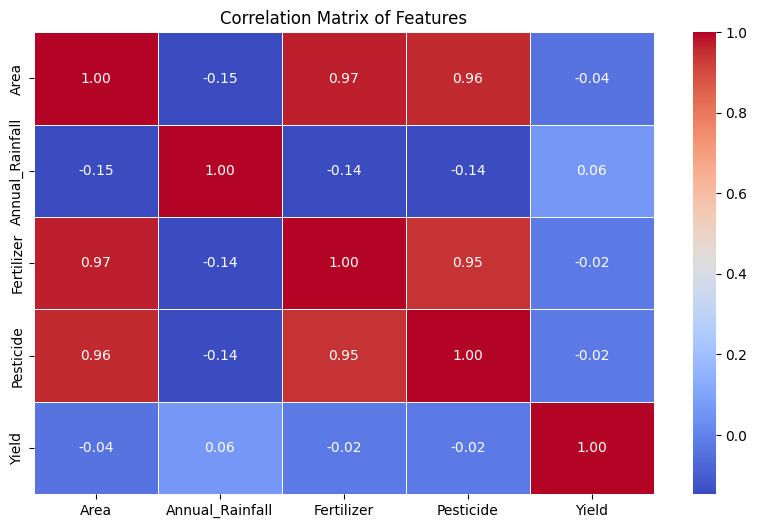

In [19]:
# Correlation matrix to see the relationship between the variables
numeric_data = df[['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']]
plt.figure(figsize=(10, 6))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            xticklabels=numeric_data.columns, yticklabels=numeric_data.columns)

plt.title('Correlation Matrix of Features')
plt.show()

# Feature Scaling

In [22]:
# Apply StandardScaler to numeric columns
numeric_cols = ['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# One Hot Encoding

In [23]:
# Handle categorical columns (Season, State, Crop_Year) using One-Hot Encoding
categorical_cols = ['Season', 'State', 'Crop_Year']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Model Building and Evaluation

In [24]:
# Split the data into training and testing sets
X = df.drop(['Yield', 'Crop'], axis=1)  # Drop 'Yield' and 'Crop'
y = df['Yield']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
linear_reg_model = LinearRegression()

# Train and evaluate
linear_reg_model.fit(X_train, y_train)
y_pred_lr = linear_reg_model.predict(X_test)

In [26]:
# Calculate metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression:\n MSE: {mse_lr}\n RMSE: {rmse_lr}\n R^2: {r2_lr}\n")

Linear Regression:
 MSE: 0.6514465373044857
 RMSE: 0.8071223806242059
 R^2: 0.34993637080854434



In [27]:
rf_model = RandomForestRegressor()

# Train and evaluate
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [28]:
# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor:\n MSE: {mse_rf}\n RMSE: {rmse_rf}\n R^2: {r2_rf}\n")

Random Forest Regressor:
 MSE: 0.0658510171653449
 RMSE: 0.2566145303082912
 R^2: 0.9342887731331284

